In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

In [2]:
data=pd.read_csv('bankloans data (1).csv')

In [3]:
data.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [4]:
data.shape

(850, 9)

In [5]:
data_ex = data[data.default.isnull() == False]  # data where default column is not null

In [6]:
data_new = data[data.default.isnull() == True]   # data where default colum

In [7]:
data_ex.shape

(700, 9)

In [8]:
data_new.shape

(150, 9)

In [10]:
data_ex.duplicated().sum()

0

In [11]:
data_ex.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    int64  
 1   ed        700 non-null    int64  
 2   employ    700 non-null    int64  
 3   address   700 non-null    int64  
 4   income    700 non-null    int64  
 5   debtinc   700 non-null    float64
 6   creddebt  700 non-null    float64
 7   othdebt   700 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 54.7 KB


In [12]:
#2.missing values treatment
data_ex.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

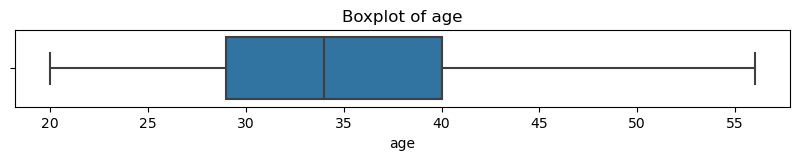

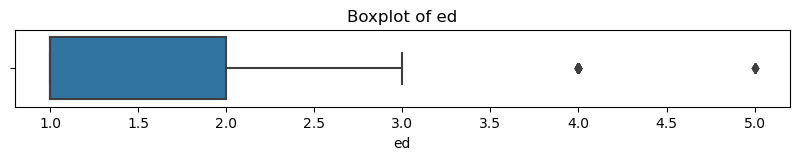

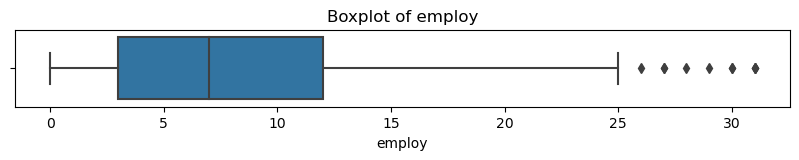

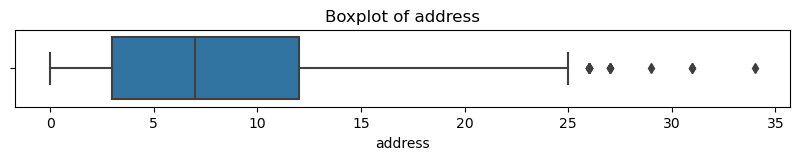

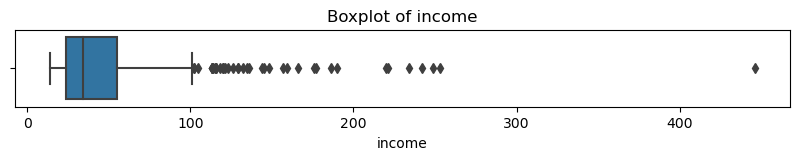

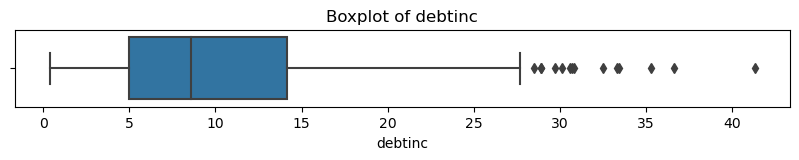

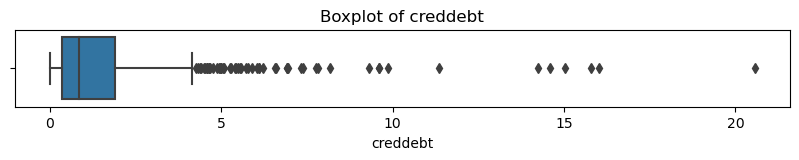

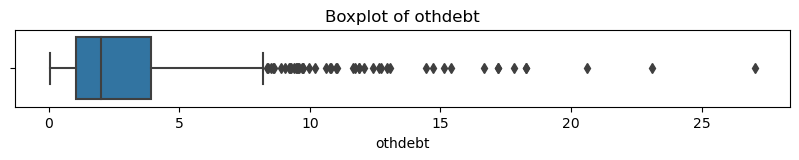

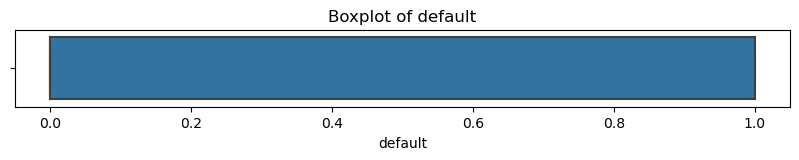

In [13]:
#3.outliar treatment 

for column in data_ex:
    plt.figure(figsize=(10,1))
    sns.boxplot(x=data_ex[column])
    plt.title(f"Boxplot of {column}")
    plt.show() 

In [14]:
d1=data_ex.copy()
d2=data_ex.copy()
d3=data_ex.copy()

In [15]:
#udf of lower cutof and upper cutof 
def outliertreat_IQR(d):
    m = d.quantile(0.5)
    q1 = d.quantile(0.25)
    q3 = d.quantile(0.75)
    q_1p = d.quantile(0.01)
    q_99p = d.quantile(0.99)
    iqr = q3 - q1
    lc = q1 - 1.5*iqr
    uc = q3 + 1.5*iqr
    return lc,uc

In [16]:
d1.apply(outliertreat_IQR)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,12.5,-0.5,-10.5,-10.5,-22.5,-8.6875,-1.930284,-3.274152,-1.5
1,56.5,3.5,25.5,25.5,101.5,27.8125,4.201299,8.241395,2.5


In [17]:
d1['ed'] = d1.ed.clip(lower = -0.5, upper = 3.5)

In [18]:
d1['employ'] = d1.employ.clip(lower = -10.5, upper = 25.5)

In [19]:
d1['address'] = d1.address.clip(lower = -10.5, upper = 25.5)

In [20]:
d1['income'] = d1.income.clip(lower = -22.5, upper = 101.5)

In [21]:
d1['debtinc'] = d1.debtinc.clip(lower = -8.6875, upper = 27.8125)

In [22]:
d1['creddebt'] = d1.creddebt.clip(lower = -1.930284, upper = 4.201299)

In [23]:
d1['othdebt'] = d1.othdebt.clip(lower = -3.274152, upper = 8.241395)

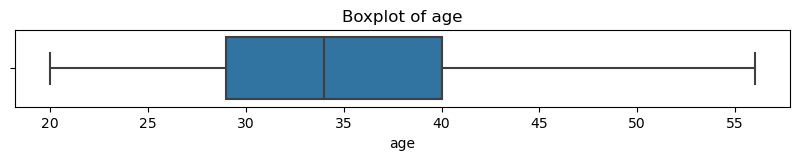

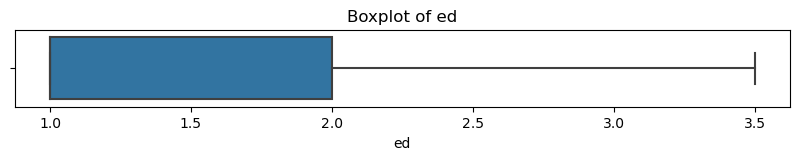

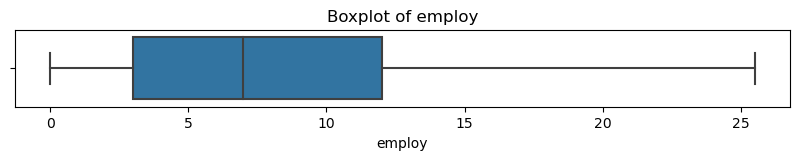

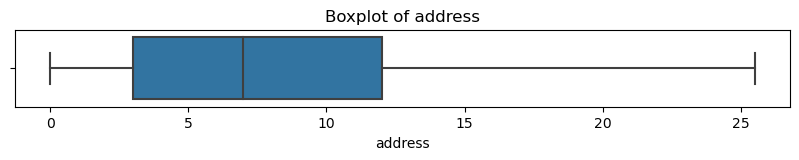

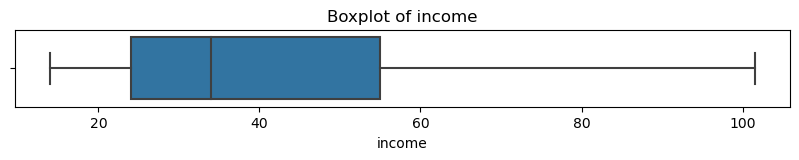

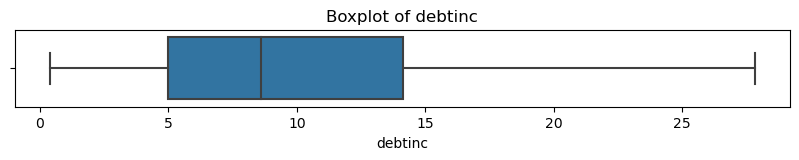

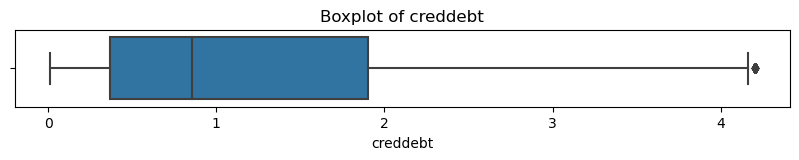

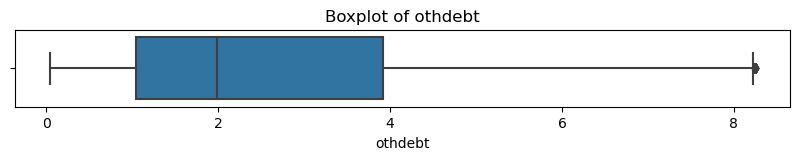

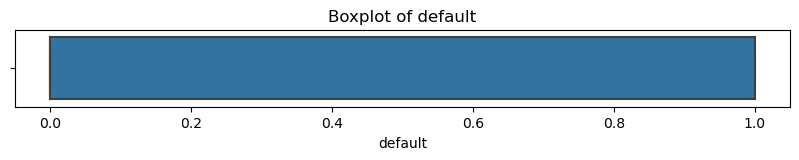

In [24]:
for column in d1:
    plt.figure(figsize=(10,1))
    sns.boxplot(x=d1[column])
    plt.title(f"Boxplot of {column}")
    plt.show() 

In [25]:
#apply outliar treatment on whoever having less ammount of outliar 
d2['ed'] = d2.ed.clip(lower = -0.5, upper = 3.5)
d2['employ'] = d2.employ.clip(lower = -10.5, upper = 25.5)
d2['address'] = d2.address.clip(lower = -10.5, upper = 25.5)

C:\Users\Gaikwad\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Gaikwad\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Gaikwad\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Gaikwad\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Gaikwad\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Gaikwad\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs

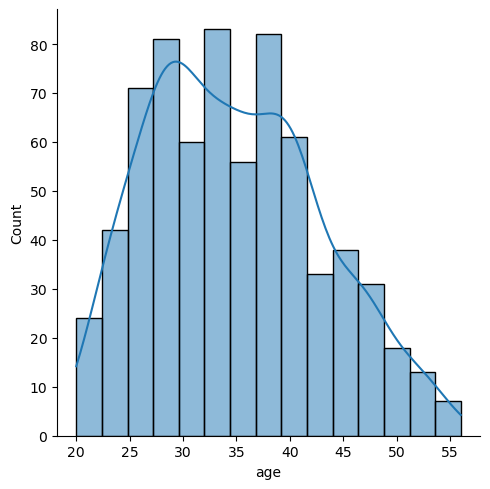

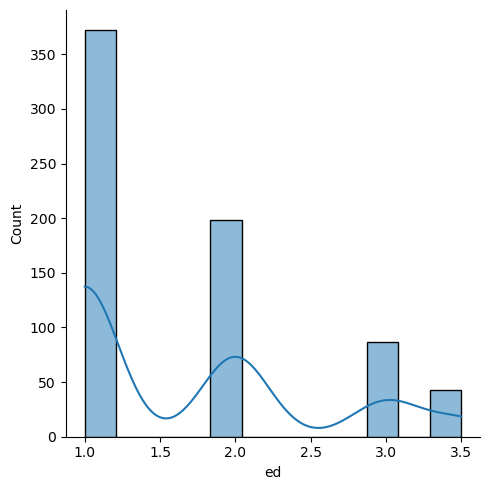

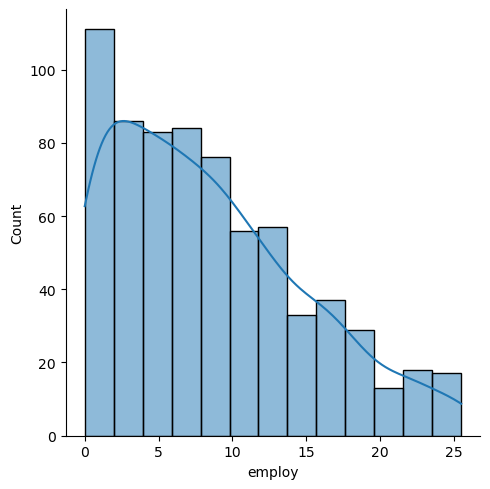

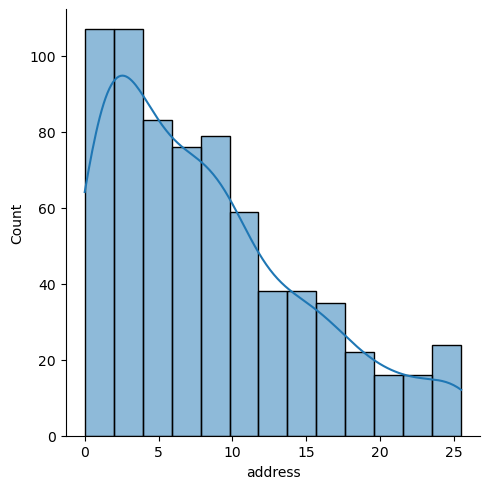

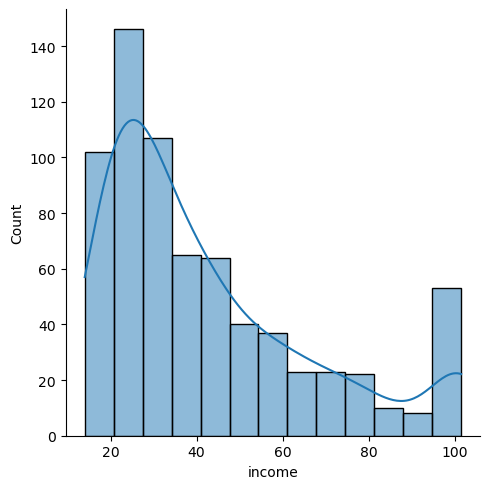

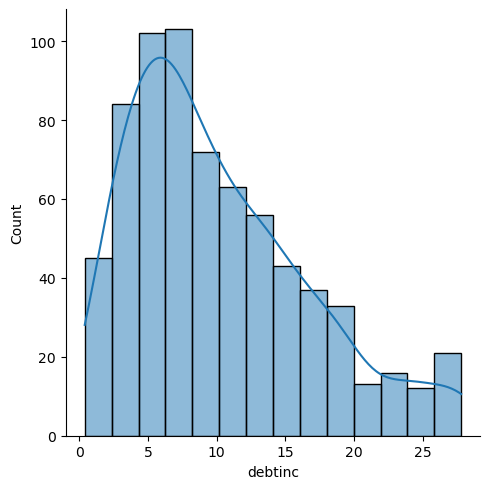

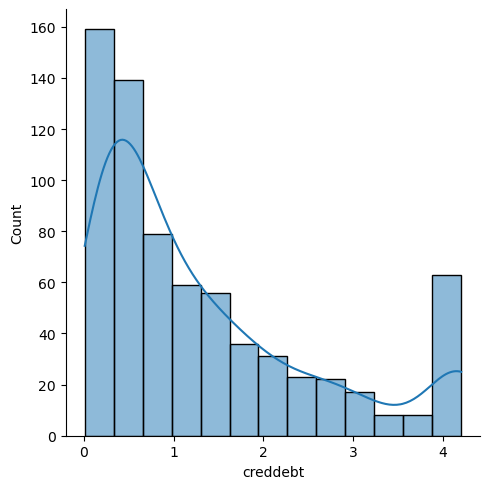

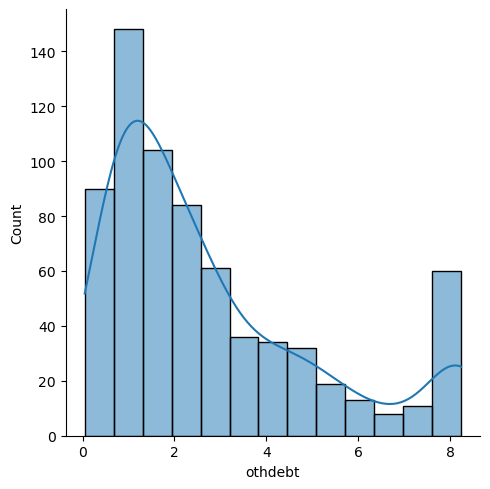

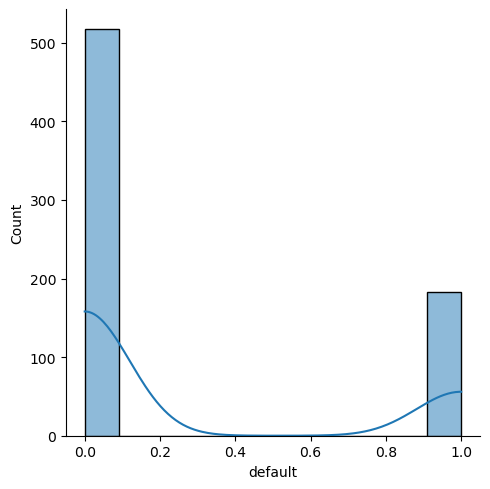

In [26]:
#4.checking the distribution of the data
#Using random distribution 
for col in d1.columns:
    sns.displot(d1[col],kde = True)

C:\Users\Gaikwad\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Gaikwad\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Gaikwad\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Gaikwad\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Gaikwad\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Gaikwad\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_

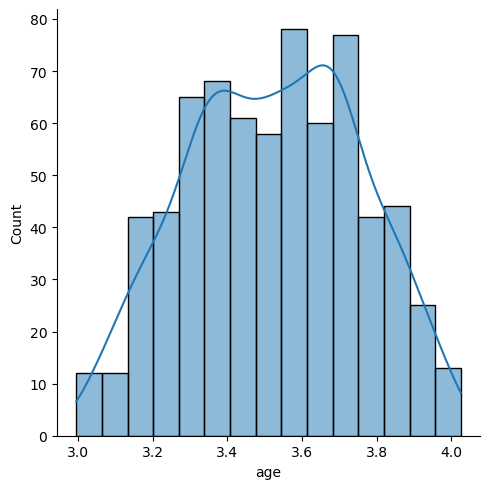

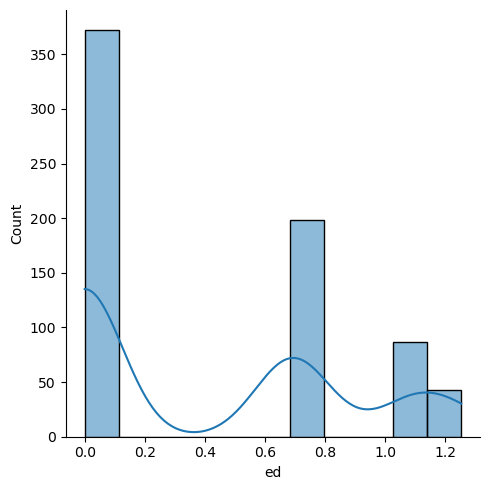

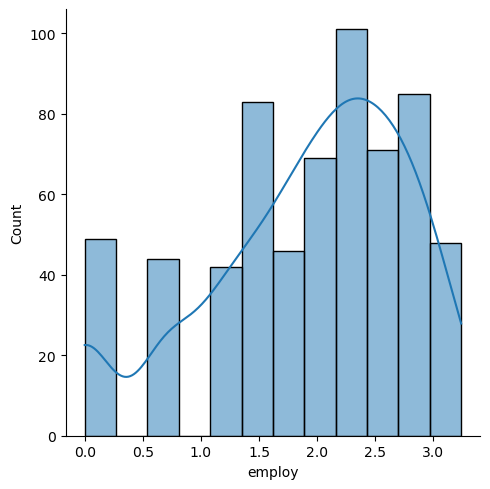

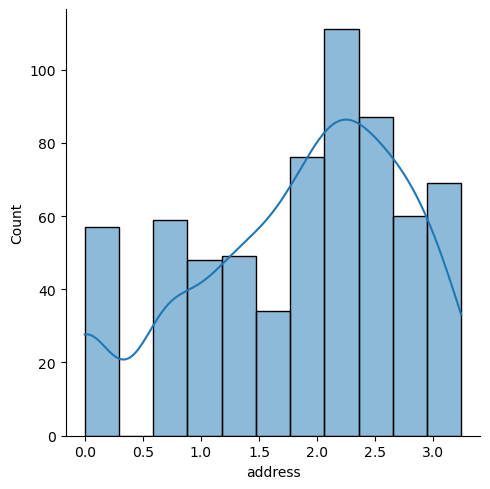

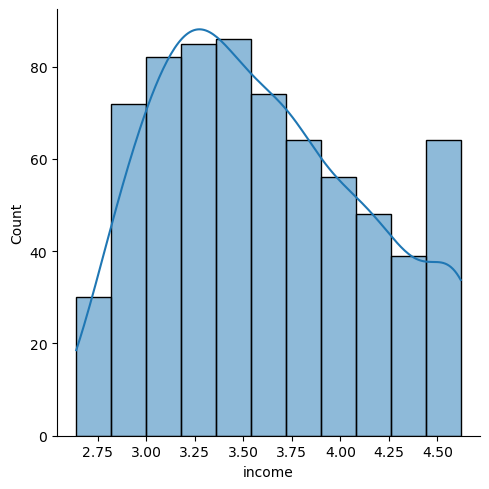

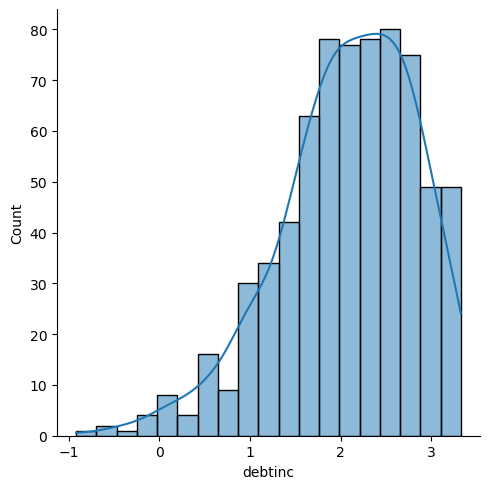

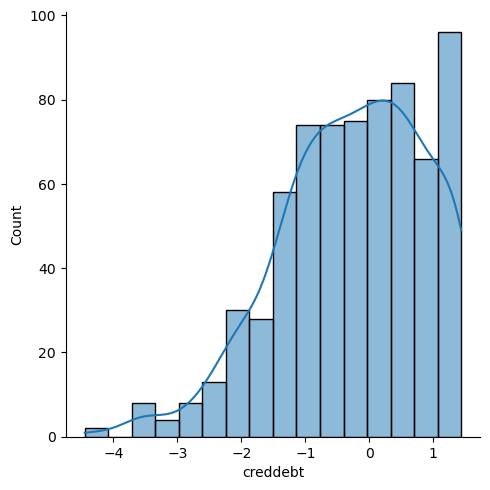

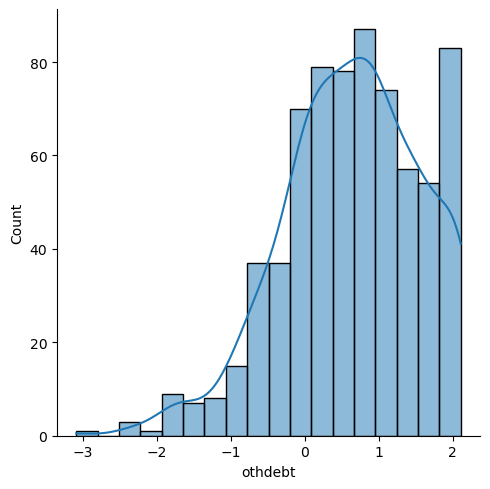

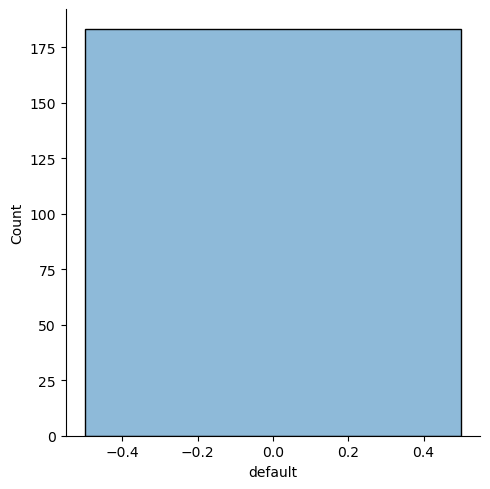

In [27]:
# Using logrethmic transformation 
for col in d1.columns:
    sns.displot(np.log(d1[col]),kde = True)

In [28]:
#5.standardization of the data 
from scipy import stats
d1_z=d1.apply(stats.zscore)
d2_z=d2.apply(stats.zscore)
d3_z=d3.apply(stats.zscore)

In [29]:
d1_z.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,0.768304,1.577706,1.331239,0.562826,2.421181,-0.133388,2.322974,0.969053,1.680814
1,-0.983529,-0.821847,0.255357,-0.333938,-0.471015,1.088807,0.031190,0.533007,-0.594950
2,0.643173,-0.821847,1.023845,0.861747,0.513562,-0.713931,-0.377367,-0.259586,-0.594950
3,0.768304,-0.821847,1.023845,0.861747,2.421181,-1.111144,1.077769,-0.842668,-0.594950
4,-1.358922,0.377929,-0.974222,-1.230701,-0.594087,1.088807,0.374449,0.124467,1.680814


In [30]:
d2_z.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,0.768304,1.577706,1.331239,0.562826,3.544603,-0.140798,4.634831,0.593692,1.680814
1,-0.983529,-0.821847,0.255357,-0.333938,-0.396908,1.031818,-0.090444,0.286919,-0.594950
2,0.643173,-0.821847,1.023845,0.861747,0.255480,-0.697790,-0.329670,-0.270693,-0.594950
3,0.768304,-0.821847,1.023845,0.861747,2.022364,-1.078890,0.522369,-0.680910,-0.594950
4,-1.358922,0.377929,-0.974222,-1.230701,-0.478457,1.031818,0.110547,-0.000501,1.680814


In [31]:
d3_z.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,0.768304,1.376911,1.294313,0.545664,3.544603,-0.140798,4.634831,0.593692,1.680814
1,-0.983529,-0.779325,0.242201,-0.334101,-0.396908,1.031818,-0.090444,0.286919,-0.594950
2,0.643173,-0.779325,0.993709,0.838919,0.255480,-0.697790,-0.329670,-0.270693,-0.594950
3,0.768304,-0.779325,0.993709,0.838919,2.022364,-1.078890,0.522369,-0.680910,-0.594950
4,-1.358922,0.298793,-0.960214,-1.213867,-0.478457,1.031818,0.110547,-0.000501,1.680814


In [32]:
#6.correlation analysis 
d1.corr()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
age,1.000000,0.015148,0.535858,0.595262,0.560951,0.018072,0.325963,0.370852,-0.137657
ed,0.015148,1.000000,-0.153540,0.057743,0.207103,0.010293,0.100188,0.157406,0.121484
employ,0.535858,-0.153540,1.000000,0.325574,0.724259,-0.038176,0.400148,0.425130,-0.289297
address,0.595262,0.057743,0.325574,1.000000,0.353031,0.015337,0.230234,0.243124,-0.165877
income,0.560951,0.207103,0.724259,0.353031,1.000000,-0.010541,0.545864,0.604043,-0.129385
debtinc,0.018072,0.010293,-0.038176,0.015337,-0.010541,1.000000,0.586530,0.657387,0.388436
creddebt,0.325963,0.100188,0.400148,0.230234,0.545864,0.586530,1.000000,0.654342,0.210470
othdebt,0.370852,0.157406,0.425130,0.243124,0.604043,0.657387,0.654342,1.000000,0.125810
default,-0.137657,0.121484,-0.289297,-0.165877,-0.129385,0.388436,0.210470,0.125810,1.000000


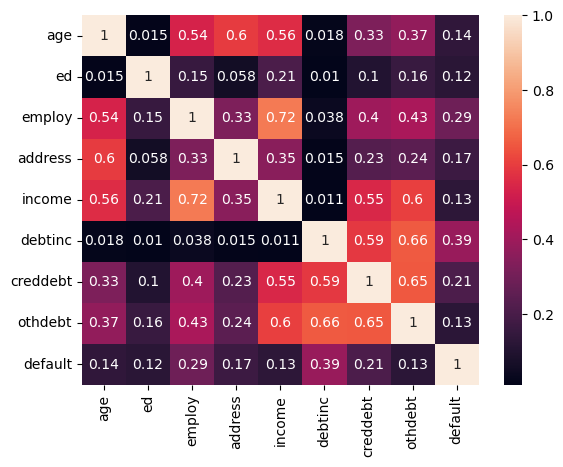

In [33]:
sns.heatmap(d1.corr().abs(),annot=True)
plt.show()

In [35]:
#7. traning testing split 
x=d1.drop('default',axis=1)
y=d1['default']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)#random_state will shuffel the data points


In [36]:
x_train.shape

(560, 8)

In [37]:
x_test.shape

(140, 8)

In [38]:
y_test.shape

(140,)

In [39]:
y_train.shape

(560,)

In [40]:
from sklearn.tree import DecisionTreeClassifier
ds=DecisionTreeClassifier(max_depth=3)

In [41]:
ds.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [42]:
op=ds.predict(x_test)

In [43]:
from sklearn.metrics import accuracy_score, classification_report

In [44]:
print(accuracy_score(op,y_test))

0.8


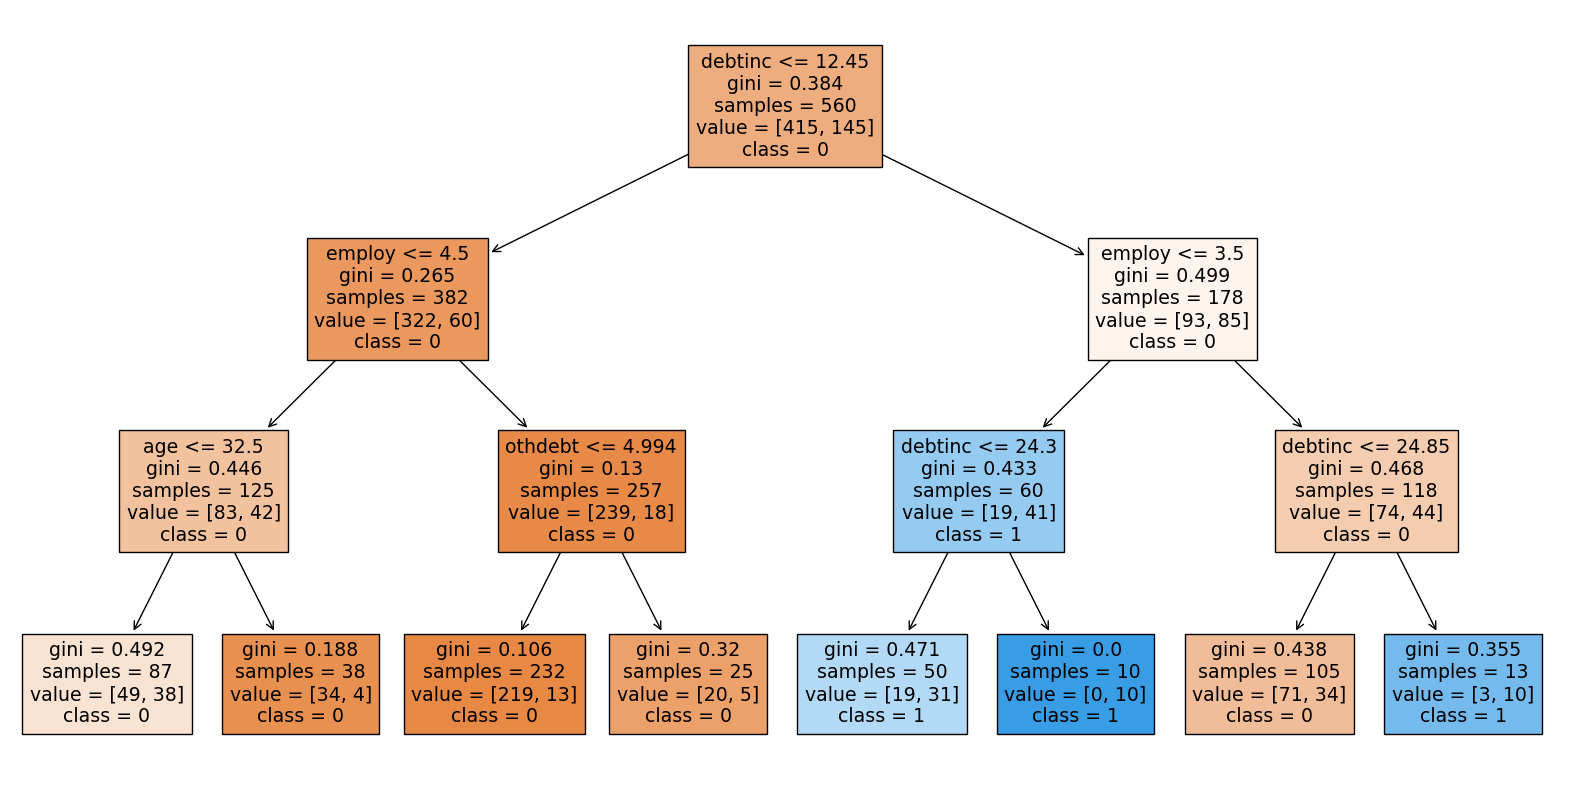

In [45]:
#8. building model using  decision trees classifier 
import matplotlib.pyplot as plt
from  sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(ds,feature_names=x.columns.tolist(),class_names=["0","1"],filled=True)
plt.show()

In [46]:
print(classification_report(op,y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.80      0.88       122
         1.0       0.37      0.78      0.50        18

    accuracy                           0.80       140
   macro avg       0.66      0.79      0.69       140
weighted avg       0.88      0.80      0.83       140



In [47]:
#8. building model using  decision trees classifier 


In [48]:
param_grid = {'max_depth': np.arange(3, 6),
             'max_features': np.arange(3,6)}

In [49]:



from sklearn.model_selection import GridSearchCV

tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
tree.fit( x_train, y_train )

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([3, 4, 5]),
                         'max_features': array([3, 4, 5])})

In [50]:
tree.best_score_

0.7642857142857145

In [51]:
tree.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features=4)

In [52]:
tree.best_params_


{'max_depth': 5, 'max_features': 4}

In [53]:
train_pred = tree.predict(x_train)



In [54]:
from sklearn.metrics  import accuracy_score,classification_report
#Module related to calculation of metrics
from sklearn import metrics


In [55]:
print(metrics.classification_report(y_train, train_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89       415
         1.0       0.71      0.63      0.67       145

    accuracy                           0.84       560
   macro avg       0.79      0.77      0.78       560
weighted avg       0.83      0.84      0.83       560



In [56]:
test_pred = tree.predict(x_test)


In [57]:
print(metrics.classification_report(y_test, test_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.88      0.83       102
         1.0       0.52      0.34      0.41        38

    accuracy                           0.74       140
   macro avg       0.65      0.61      0.62       140
weighted avg       0.71      0.74      0.72       140



In [58]:
from sklearn.linear_model import LogisticRegression 

In [59]:
llr=LogisticRegression()


In [60]:
llr.fit(x_train,y_train)

C:\Users\Gaikwad\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
predict=llr.predict(x_test)

In [62]:
print(accuracy_score (y_test,predict))

0.8642857142857143


In [63]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91       102
         1.0       0.88      0.58      0.70        38

    accuracy                           0.86       140
   macro avg       0.87      0.77      0.81       140
weighted avg       0.87      0.86      0.85       140



In [64]:
predict1=llr.predict(x_train)

In [65]:
print(accuracy_score (y_train,predict1))

0.7857142857142857


In [66]:
print(classification_report(y_train,predict1))

              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86       415
         1.0       0.64      0.39      0.49       145

    accuracy                           0.79       560
   macro avg       0.73      0.66      0.68       560
weighted avg       0.77      0.79      0.77       560



**KNN**

In [67]:
# For running the KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

In [68]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

**Predicting on train dataset to further calculate evaluation metrics**

In [69]:
train_pred = knn_model.predict(x_train)

In [70]:
print('\n---- Confusion Matrix : \n')

print('\n Train : ')
print(metrics.confusion_matrix(y_train, train_pred))

print('\n---- Classification Report : \n')
print('\n Train : ')
print(metrics.classification_report(y_train, train_pred))


---- Confusion Matrix : 


 Train : 
[[392  23]
 [ 73  72]]

---- Classification Report : 


 Train : 
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89       415
         1.0       0.76      0.50      0.60       145

    accuracy                           0.83       560
   macro avg       0.80      0.72      0.75       560
weighted avg       0.82      0.83      0.82       560



**Test the KNN Algorithm on the test dataset**

In [71]:
test_pred = knn_model.predict(x_test)

print('\n---- Confusion Matrix : \n')

print('\n Train : ')
print(metrics.confusion_matrix(y_train, train_pred))
print('\n Test : ')
print(metrics.confusion_matrix(y_test, test_pred))

print('\n---- Classification Report : \n')
print('\n Train : ')
print(metrics.classification_report(y_train, train_pred))
print('\n Test : ')
print(metrics.classification_report(y_test, test_pred))


---- Confusion Matrix : 


 Train : 
[[392  23]
 [ 73  72]]

 Test : 
[[97  5]
 [28 10]]

---- Classification Report : 


 Train : 
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89       415
         1.0       0.76      0.50      0.60       145

    accuracy                           0.83       560
   macro avg       0.80      0.72      0.75       560
weighted avg       0.82      0.83      0.82       560


 Test : 
              precision    recall  f1-score   support

         0.0       0.78      0.95      0.85       102
         1.0       0.67      0.26      0.38        38

    accuracy                           0.76       140
   macro avg       0.72      0.61      0.62       140
weighted avg       0.75      0.76      0.73       140



**DATA = D2**

In [72]:
x=d2.drop('default',axis=1)
y=d2['default']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)#random_state will shuffel the data points

In [73]:
x_train.shape

(560, 8)

In [74]:
from sklearn.tree import DecisionTreeClassifier
d2s=DecisionTreeClassifier(max_depth=3)

In [75]:
d2s.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [76]:
d2_pred = d2s.predict(x_test)

In [77]:
from sklearn.metrics import accuracy_score, classification_report

In [78]:
print(classification_report(d2_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.92      0.82      0.87       115
         1.0       0.45      0.68      0.54        25

    accuracy                           0.79       140
   macro avg       0.68      0.75      0.70       140
weighted avg       0.84      0.79      0.81       140



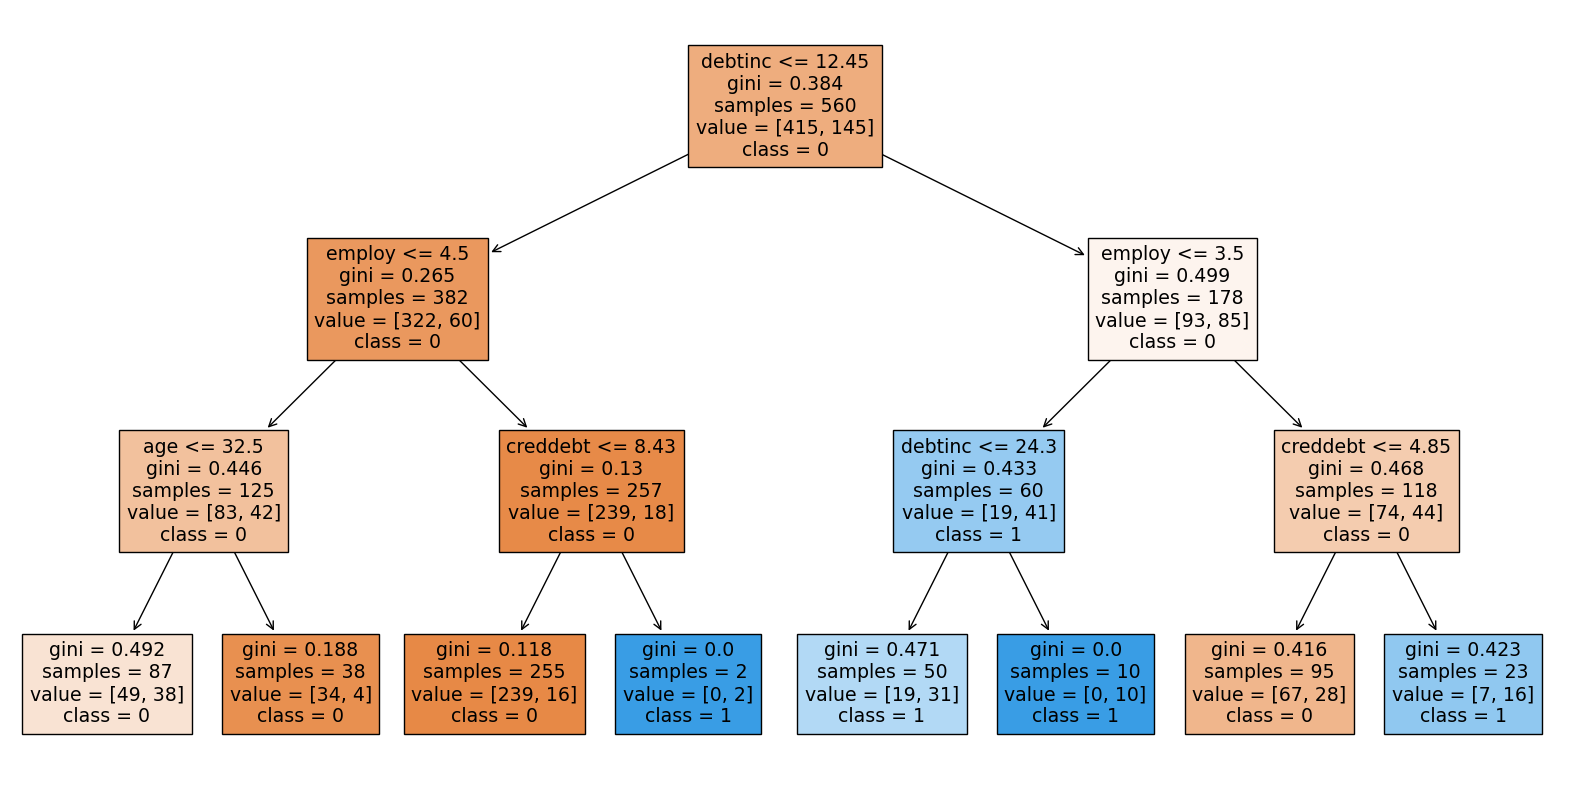

In [79]:
#8. building model using  decision trees classifier 
import matplotlib.pyplot as plt
from  sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(d2s,feature_names=x.columns.tolist(),class_names=["0","1"],filled=True)
plt.show()

building model using  decision trees classifier 

In [80]:
d2_param_grid = {'max_depth': np.arange(3, 6),
             'max_features': np.arange(3,6)}

In [81]:
from sklearn.model_selection import GridSearchCV

tree = GridSearchCV(DecisionTreeClassifier(), d2_param_grid, cv = 5)
tree.fit( x_train, y_train )

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([3, 4, 5]),
                         'max_features': array([3, 4, 5])})

In [82]:
tree.best_score_

0.75

In [83]:
tree.best_estimator_

DecisionTreeClassifier(max_depth=3, max_features=5)

In [84]:
tree.best_params_

{'max_depth': 3, 'max_features': 5}

In [85]:
d2_train_pred = tree.predict(x_train)

In [86]:
print(classification_report(y_train, d2_train_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.94      0.87       415
         1.0       0.69      0.41      0.51       145

    accuracy                           0.80       560
   macro avg       0.76      0.67      0.69       560
weighted avg       0.79      0.80      0.78       560



In [87]:
d2_test_pred = tree.predict(x_test)

In [88]:
print(metrics.classification_report(y_test, d2_test_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87       102
         1.0       0.68      0.45      0.54        38

    accuracy                           0.79       140
   macro avg       0.75      0.68      0.70       140
weighted avg       0.78      0.79      0.78       140



**LOGISTIC REGRESSION FOR D2**

In [89]:
from sklearn.linear_model import LogisticRegression 

In [90]:
llr=LogisticRegression()
llr.fit(x_train,y_train)

LogisticRegression()

In [91]:
d2_train_predict=llr.predict(x_train)

In [92]:
print(classification_report(y_train,d2_train_predict))

              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87       415
         1.0       0.66      0.45      0.53       145

    accuracy                           0.80       560
   macro avg       0.75      0.68      0.70       560
weighted avg       0.78      0.80      0.78       560



In [93]:
d2_test_predict=llr.predict(x_test)

In [94]:
print(classification_report(y_test,d2_test_predict))

              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90       102
         1.0       0.81      0.58      0.68        38

    accuracy                           0.85       140
   macro avg       0.84      0.76      0.79       140
weighted avg       0.85      0.85      0.84       140



**KNN**

In [95]:
from sklearn.neighbors import KNeighborsClassifier

In [96]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [97]:
d2_train_pred = knn_model.predict(x_train)

In [98]:
d2_test_pred = knn_model.predict(x_test)

In [99]:

print('\n---- Classification Report : \n')
print('\n Train : ')
print(metrics.classification_report(y_train, d2_train_pred))
print('\n Test : ')
print(metrics.classification_report(y_test, d2_test_pred))


---- Classification Report : 


 Train : 
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89       415
         1.0       0.77      0.50      0.60       145

    accuracy                           0.83       560
   macro avg       0.80      0.72      0.75       560
weighted avg       0.82      0.83      0.82       560


 Test : 
              precision    recall  f1-score   support

         0.0       0.77      0.96      0.85       102
         1.0       0.67      0.21      0.32        38

    accuracy                           0.76       140
   macro avg       0.72      0.59      0.59       140
weighted avg       0.74      0.76      0.71       140

